# Netflix Dataset  

The Dataset explores different attributes of TV shows and movies streamed on the Netflix platform worldwide. Attributes include; title, director, country, ratings, genre, release year, duration and data added to neflix streaming platform.

The aim of this project is to gain insights and to ascertain how Netflix could maximise its content delivery globally, based on these different attributes. These insights may be used to increase Netflix subscribers and increase customer satisfaction.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='deep')#set theme, default palette is 'deep' 

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8) #configure the size of the plots we will create 

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#set error reduction, when you use matplotlip with seaborn

In [2]:
# read the data and assign to a dataframe

df = pd.read_csv('data/Netflix.csv')

# Exploratory Data Analysis (EDA) with Visualisations. 

In [3]:
# first three rows of the dataframe

df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [4]:
# last three rows of the dataframe

df.tail(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,06/07/2018,2016,TV-Y7,1 Season,Kids' TV


In [5]:
# extract: total entries (rows) & columns, column names, no. of non-null and data types in columns and memory

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


The dataset contains 8790 entries/rows and 12 columns. The data types are primarily object types, therefore contain strings.  There are no null values, however, this will need to be verified upon exploration of the dataset.   

In [6]:
#no. of rows and columns

df.shape

(8790, 10)

In [7]:
# columns in the dataframe

df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Description of columns



1. show_id - Unique identifier for each movie/tv show.
2. type - Type of content such as movie or TV show.
3. title - Title of movie or tv show.
4. director - Director of movie or tv show.
5. country - The country where the movie or TV show was produced.
6. date_added - The date when the content was added to Netflix streaming platform.
7. release_year - The year the movie or TV show was originally released.
8. rating - The content's rating - indicates the recommended audience age or maturity level (e.g., PG-13).
9. Duration - The duration of the movie or TV show (minutes/seasons)
10. listed_in - Classification of content into categories 

# Initial Observations


# How many Null values are in the data set?

In [8]:
# how many null values in the data set?

# iterate through every row in each column, and check for null values using .isnull() method
# print each column name and the number of null values using .format() method.

for col in df.columns:
    null_values = df[col].isnull().sum()
    
    print('{} - {}'.format(col, null_values))

# alternatively we could use: df.isnull().sum()


show_id - 0
type - 0
title - 0
director - 0
country - 0
date_added - 0
release_year - 0
rating - 0
duration - 0
listed_in - 0


- Although none of the columns show null values, we can see there is missing data in the 'director' column, this is specified as 'Not Given'. It would be worth exploring all the columns to check for  more missing data. 


# "show_id" column

In [9]:
# index into the first value in the show_id rows to check whether id values begin with 's'.

df['show_id'].str[0].value_counts()

s    8790
Name: show_id, dtype: int64

- It looks like the "show_id" begins with the letter "s". We could set the show_id as the index. 

In [10]:
# Check if any ids do not contain numbers.

df[df['show_id'] == 's']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


# "type" column

In [11]:
# There are no missing values 

df['type'].count()

8790

In [12]:
# Index into column and show unique values 

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [13]:
# Show the frequency of content types, i.e, ratio of movies to tv shows using value_counts
# This also confirms there are no null values in this column

df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [14]:
# percentage of movies = no.of movies / length of df * 100. Values are then rounded 

percentage_movies  = round(len(df[df['type'] == 'Movie']) / len(df) *100, 2)
percentage_movies

69.69

- The type of content is either 'TV show' or 'Movie'. We can split categorical data and perform analysis of both movies and TV shows. 

- 69.69% of the content type in the Netflix dataset are movies. 

# 'title' column

In [15]:
# There are 3 titles that are duplicated (8790-8787).

df['title'].nunique()

8787

In [16]:
# return the titles that are duplicates.

df['title'].value_counts()

09-Feb                  2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [17]:
# show the duplicate titles 

df[df['title'] == '09-Feb']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,09-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,s5965,TV Show,09-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"


In [18]:
# show the duplicate titles 

df[df['title'] == '15-Aug']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [19]:
# show the duplicate titles 

df[df['title'] == '22-Jul']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"


- Duplicate titles will need to be removed 

# 'director' column

In [20]:
df['director'].count()

8790

In [21]:
# No. of unique directors in the dataset

df['director'].nunique()

4528

In [22]:
# Rajiv Chilaka directed the highest number of content (either movies or tv shows)

df['director'].value_counts()

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [23]:
# show first 5 movies directed by Rajiv Chilaka. 

df[df['director'] == 'Rajiv Chilaka'].head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
511,s420,Movie,Chhota Bheem: Bheem vs Aliens,Rajiv Chilaka,India,7/22/2021,2010,TV-Y7,69 min,"Children & Family Movies, Sports Movies"
561,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,India,7/22/2021,2013,TV-Y7,64 min,Children & Family Movies
562,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,India,7/22/2021,2009,TV-Y7,68 min,Children & Family Movies
563,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,India,7/22/2021,2011,TV-Y7,67 min,Children & Family Movies
565,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,India,7/22/2021,2010,TV-Y7,66 min,Children & Family Movies


In [24]:
# show the rows with missing directors.

df[df['director'] == 'Not Given']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,TV Show,Jaguar,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,TV Show,Chicago Party Aunt,Not Given,Pakistan,9/17/2021,2021,TV-MA,1 Season,TV Comedies
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


There are 2588 rows with no data in the 'director' column, we may need to replace this with another value such as 'unknown'.

In [25]:
# Calculate missing directors

director_null_values  = round(len(df[df['director'] == 'Not Given']) / len(df) *100, 2)
director_null_values

29.44

29.44% of data is missing in the 'director' column

# "country" column

In [26]:
# Count method does not indicate any missing values, therefore use value_counts.

df['country'].count()

8790

In [27]:
# There are 287 missing values in the "country" column

df['country'].value_counts().head(10)

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

Majority of the content was produced in the USA (3240), followed by India (1057) and UK (638).

In [28]:
# data is based on 86 different countries

df['country'].nunique()

86

In [29]:
#show missing countries.

df[df['country'] == 'Not Given']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,01/01/2020,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,09/01/2018,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,12/15/2019,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,08/09/2019,2019,TV-MA,96 min,"Documentaries, Sports Movies"


There are 287 rows with no data in the 'country' column, we may need to replace this with another value such as 'unknown'.

In [30]:
country_null_values  = round(len(df[df['country'] == 'Not Given']) / len(df) *100, 2)
country_null_values

3.27

3.27% of data is missing in the 'country' column

# 'date_added' column

In [31]:
df[['date_added']].head(10)

,date_added
0,9/25/2021
1,9/24/2021
2,9/24/2021
3,9/22/2021
4,9/24/2021
5,9/24/2021
6,9/24/2021
7,05/01/2021
8,9/23/2021
9,05/01/2021


The date is formatted differently, 'month/date/year' or 'date/month/year'. It may be worth standardising the format.

Also, the 'date_added' column is an object type which means we have strings for the dates, which is indicated by '/' symbol. It would be better if this column is converted to date type (datetime64), so that we can perform further analysis.

In [32]:
# convert the column to datetime and show first 5 rows.

df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [33]:
# Now that the column has been converted, we can perform descriptive statistics.

df[['date_added']].describe(datetime_is_numeric=True)

,date_added
count,8790
mean,2019-05-17 21:44:01.638225408
min,2008-01-01 00:00:00
25%,2018-04-06 00:00:00
50%,2019-07-03 00:00:00
75%,2020-08-19 18:00:00
max,2021-09-25 00:00:00


- count: number of content added to the streaming platform is 8790.
- mean year that content was added is 2019.
- The minimum number of content added was 2008.
- 25% of content was added between 2008 and 2018.
- 50% of content was added before 2019 and 50% was added after 2019.
- 75% of content was added from 2008 and 2020.
- The maximum number of content was added in 2021.  
- The content is generally added to the platform at midnight. 

# 'release_year' column

In [34]:
# Top 10 release years

df['release_year'].value_counts().head(10)

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

In [35]:
# As most of the data is non numerical, descriptive statistics for numerical data is limited

df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- count - 8790 movies released.

- 25% of movies was released between 1925 and 2013.

- 50% of movies were released before 2017 and 50% after 2017.

- 75% of movies were released between 1925 and 2019.

- 25% of movies were released between 2019 and 2021.

- 1925 indicates the year with the minimum movie releases.

- 2021 indicates the year with the maximum movie releases.

- Mean release year is approximately 2014.

- Standard Deviation is approximately 8.82 years. This seems relatively low indicating majority of the movies do not deviate from the mean (2014).

See below for visualisation.


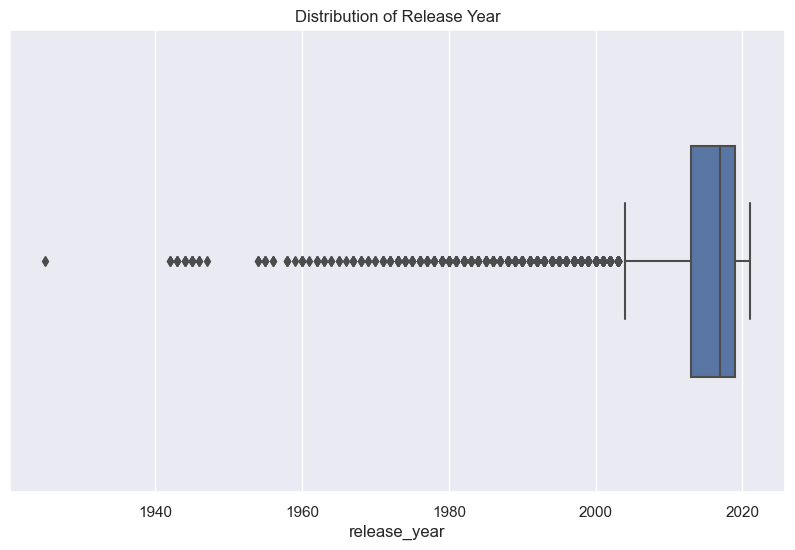

In [36]:
# As we are dealing with numerical data, we can plot the distribution of release years. 

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['release_year'], width=0.5);
plt.title('Distribution of Release Year')
plt.show()

The data looks significantly positively skewed with many outliers 

In [37]:
# Calculate Q1 and Q3

Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)

Q1 # the data point exactly halfway through the lower half of the dataset. 

2013.0

In [38]:
# Q3 - halfway point from the median to the end of the dataset. 

Q3

2019.0

In [39]:
# calculate IQR - a measure of the dispersion of data

IQR = Q3 - Q1
IQR 

6.0

In [40]:
# lower boundary = Q1 - 1.5 * IQR

lower_limit = Q1 - (1.5*IQR)
lower_limit

2004.0

In [41]:
# upper boundary = Q3 + 1.5 * IQR

upper_limit = Q3 + (1.5*IQR)
upper_limit

2028.0

Anything beyond the lower and upper boundaries are considered to be outliers. Let's calculate the number of outliers. 

In [42]:
# Use the lower limit to locate all outliers. 

outliers = sum(df['release_year'] <= 2004)
outliers

781

In [43]:
percentage_outliers = round((outliers / len(df)) * 100, 2)
percentage_outliers

8.89

Above, we have calculated the number of outliers (781) in the data set and converted that to a percentage (8.89%). If we were to drop the outliers, this would narrow the data set due to 781 missing rows. 

# 'rating' column

In [44]:
# There is no missing data

df['rating'].count()

8790

In [45]:
# There are 14 unique ratings

df['rating'].nunique()

14

In [46]:
# Unique ratings 

df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Decription of ratings: https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions

Top 5 content ratings:
1. TV-MA (TV shows, mature audience)
2. TV-14 (TV-parents strongly cautioned)
3. TV-PG (Parental Guidance
4. R (Restricted)
5. PG-13 (Movies: Parent Strongly Cautioned)

# 'duration' column

In [47]:
# There seems to be no missing data

df['duration'].count()

8790

In [48]:
df['duration'].isnull().sum()

0

In [49]:
# There are 220 different durations in the dataset, 1 season occuring most frequently (1791).

df['duration'].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [50]:
df['duration'].describe()

count         8790
unique         220
top       1 Season
freq          1791
Name: duration, dtype: object

In [51]:
# Longest movie is 99 minutes 

df[df['type'] == 'Movie']['duration'].max()

'99 min'

In [52]:
# There are 118 movies that are 99 minutes long

df[df['duration'] == '99 min'].head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
68,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,Japan,2021-09-15,2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio..."
69,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,Japan,2021-09-15,2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio..."
173,s120,Movie,Here and There,JP Habac,Philippines,2021-09-02,2020,TV-MA,99 min,"Dramas, International Movies, Romantic Movies"
476,s338,Movie,Good Luck Chuck,Mark Helfrich,United States,2021-08-01,2007,R,99 min,"Comedies, Romantic Movies"
488,s345,Movie,My Girl 2,Howard Zieff,United States,2021-08-01,1994,PG,99 min,"Children & Family Movies, Comedies, Dramas"


In [53]:
# Shortest Movie is 10 mins

df[df['type'] == 'Movie']['duration'].min()

'10 min'

In [54]:
# Shortest movie is listed as a documentary.

df[df['duration'] == '10 min']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
7575,s3536,Movie,American Factory: A Conversation with the Obamas,Not Given,United States,2019-09-05,2019,TV-G,10 min,Documentaries


In [55]:
# Longest TV Show/s had 9 seasons 

df[df['type'] == 'TV Show']['duration'].max()

'9 Seasons'

In [56]:
# There are 9 TV Shows that are 9 seasons long, majority of which were produced in USA

df[df['duration'] == '9 Seasons'].head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
551,s6505,TV Show,Club Friday The Series 6,Not Given,Pakistan,2019-03-09,2015,TV-MA,9 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
1689,s1999,TV Show,Call the Midwife,Philippa Lowthorpe,United Kingdom,2020-09-15,2020,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D..."
2690,s3542,TV Show,Naruto,Hayato Date,Japan,2019-09-01,2006,TV-14,9 Seasons,"Anime Series, International TV Shows"
6584,s68,TV Show,Saved by the Bell,Not Given,United States,2021-09-15,1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies"


In [57]:
# Shortest TV Show had 1 season.

df[df['type'] == 'TV Show']['duration'].min()

'1 Season'

In [58]:
# 1791 TV Shows had 1 season.

df[df['duration'] == '1 Season'].head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
20,s4832,TV Show,True: Magical Friends,"Mark Thornton, Todd Kauffman",United States,2018-06-15,2018,TV-Y,1 Season,Kids' TV


# 'listed_in' column

In [59]:
# There seems to be no missing values 

df['listed_in'].count()

8790

In [60]:
# No missing data 

df[df['listed_in'] == 'Not Given']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [61]:
# majority of the content in the data set is based on Dramas, Documentaries and Comedy.

df['listed_in'].value_counts()

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64

In [62]:
# There is an exhaustive list of genres

df['listed_in'].nunique()

513

# Descriptive Statistics on non numerical columns

In [63]:
# descriptive statistics on non numerical (object) columns

df.describe(include=['O'])

,show_id,type,title,director,country,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,14,220,513
top,s1,Movie,09-Feb,Not Given,United States,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,3205,1791,362


# Netflix Content Observations

- Majority of the content is focused on movies (69.9% or 6126).

- Top 5 countries producing content: US, India, UK, Pakistan & Canada. This indicates a diverse range of content. 

- The mean release year is 2014, with the median as 2017 and Q3 as 2019 indicates that most of the content on Netflix is relatively recent, last 10 years.  

- Top 10 release years were between 2012 and 2021, with the most movies released in 2018. 

- Netflix focuses on content suitable for a mature audience ("TV-MA" appears most frequently) and teenagers. Top 5 content ratings:TV-MA, TV-14, TV-PG, R, PG-13. 

- Top 3 listings: Dramas/International, Documentaries and Standup Comedy.  

- Missing values: directors (29.4%) and countries (3.27%). Almost all of the missing values are in the 'directors' column, which should not have a significant impact on our conclusions.  

# Data types in the dataset 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In order to observe correlations and perform visualisations, we need to look at the variables within the data. All columns (except 'release_year' and 'date_added') contain categorical data; types of data that may be divided into groups. These variables usually have a fixed number of values such as; country, type of content, ratings. 

The data types in the data set is predominantly object data type except the 'release_year' column, which has an integer based data type. Therefore, numerical calculations are limited. 

Majority of the data cannot be ordered, except for 'duration', 'date_added' and 'release_year' columns.  

To draw insights from the data, it may be worth converting some of the columns ('type', 'country', 'rating', 'listed_in') into categorical data types. This can speed up some operations and save on memory. We are also likely to group the data and perform aggregate methods. 

# Data Manipulation and Cleaning 
- Apply functions to column and set show_id as index
- remove duplicate titles (3)
- convert 'not given' to unknown for 'country' and 'director' columns
- convert column data types


# Apply function to 'show_id' and set as the Index

In [65]:
df.index

RangeIndex(start=0, stop=8790, step=1)

In [66]:
# define a function that takes a value and returns all characters after the first character 's'.
# Return as an integer

def remove_s(x):
    return int(x[1:])

In [67]:
# replace the 'show_id' column with function, apply to the column.

df['show_id'] = df['show_id'].apply(remove_s)

In [68]:
# 's' has been renived from the column.

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [69]:
# set show_id as the index and save to original data frame

df.set_index(['show_id'], inplace=True)

In [70]:
# Now we have 9 columns instead of 10.

df

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."


# Remove Duplicate Rows

The .drop_duplicates() method has been used as this will drop duplicate rows based on all the columns (all columns, for the duplicated rows are identical). 

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
# three rows have been removed 

df

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."


In [73]:
# one of the rows have been removed 

df[df['title'] == '09-Feb']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
3997,TV Show,09-Feb,Not Given,Pakistan,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas"


In [74]:
# one of the rows have been removed 

df[df['title'] == '15-Aug']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
3963,Movie,15-Aug,Swapnaneel Jayakar,India,2019-03-29,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [75]:
# one of the rows have been removed 

df[df['title'] == '22-Jul']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
4523,Movie,22-Jul,Paul Greengrass,Norway,2018-10-10,2018,R,144 min,"Dramas, Thrillers"


In [76]:
# The number of unique titles equates to the number of rows in the dataframe, duplicates removed.

df['title'].nunique()

8787

# Dealing with 'Not Given' values

- There are two columns with 'Not Given' values ('directors' (29.44%) and 'country' (3.27%)). 

- Note: the missing data is NOT in the form of a NaN value, which means we can perform operations on the 'Not Given' dataset, without causing errors or skewing the results.

- Secondly, the amount of 'Not Given' data is relatively minimal given the size of the dataset. 

- Because the 'Not Given' data is in 2 out of 9 columns, it makes little sense to remove the rows for these columns. 

Considering the above, I will change the value from 'Not Given' to 'Uknown', for the specified columns.

In [77]:
# There are now 2587 'Not Given' values since duplicates have been removed 

df['director'].value_counts()

Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [78]:
# replace the duplicates in dataframe, from old to new value, and save to original dataframe

df.replace(to_replace='Not Given', value= 'Unknown', inplace=True)

In [79]:
# All of the old values in 'director' column has been removed 

df[df['director'] == 'Not Given']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,


In [80]:
# All of the old values in 'country' column has been removed 

df[df['country'] == 'Not Given']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,


# Converting column data types 

We have already converted the 'date_added' column to datetime type. We will convert the columns (categorical/ variables) to categorical data type so that we perform operations later. These columns will have no specific ordering, they are nominal variables. This is especially useful in machine learning medelling.  

In [81]:
# select the columns and assign to new variable 

categorical_columns = ['type', 'country', 'rating']

In [82]:
# Change the column type and assign it to the dataframe

df[categorical_columns] = df[categorical_columns].astype('category')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 1 to 8786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8787 non-null   category      
 1   title         8787 non-null   object        
 2   director      8787 non-null   object        
 3   country       8787 non-null   category      
 4   date_added    8787 non-null   datetime64[ns]
 5   release_year  8787 non-null   int64         
 6   rating        8787 non-null   category      
 7   duration      8787 non-null   object        
 8   listed_in     8787 non-null   object        
dtypes: category(3), datetime64[ns](1), int64(1), object(4)
memory usage: 509.8+ KB


By converting the column types, we can see the memory usage has decreased and is therefore more efficient. 

# Netflix Content Type Overview

**Type of Content streamed on Netflix and its Distribution**

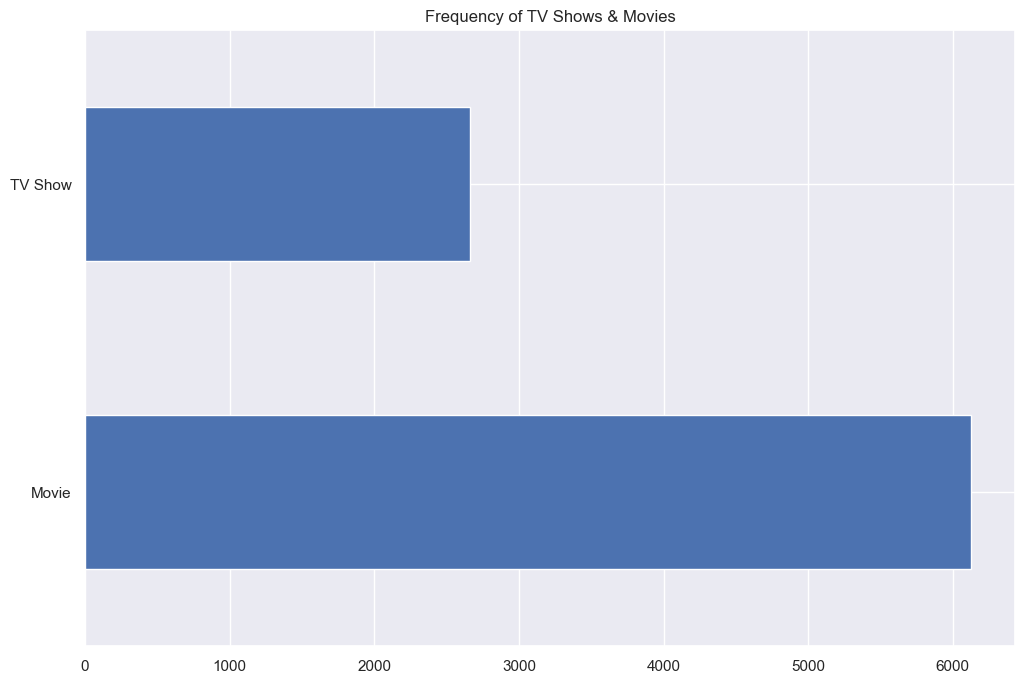

In [84]:
# Visualise content (TV Shows and Movies), categorical data using a bar chart.

df['type'].value_counts().plot(kind='barh', title='Frequency of TV Shows & Movies');


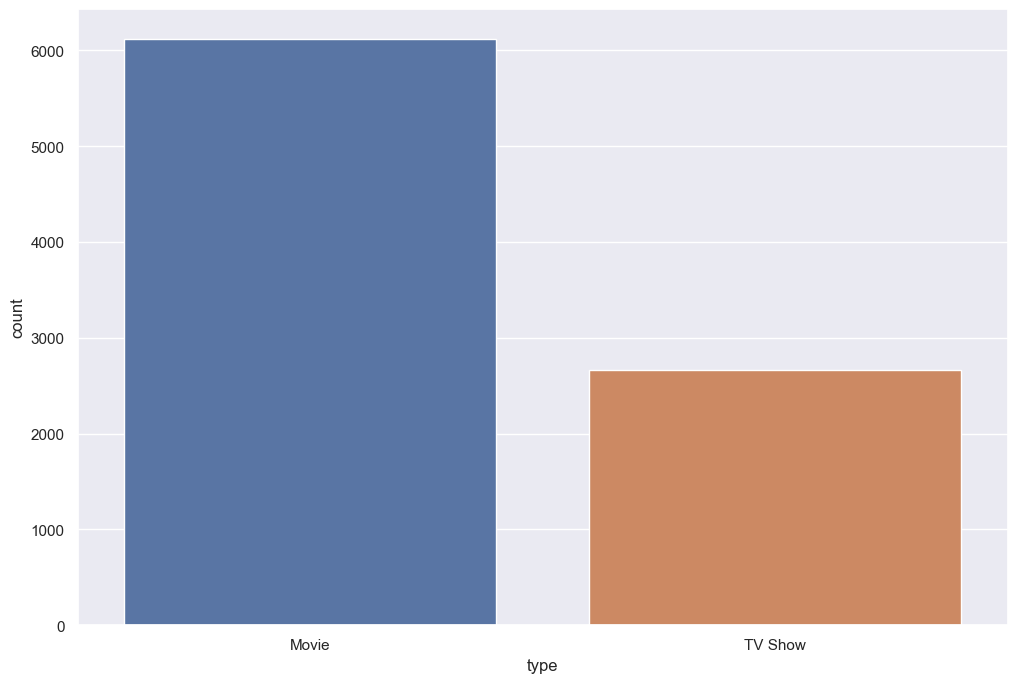

In [85]:
# Countplot displays categorical data

sns.countplot(df, x=df['type']);

In [86]:
# Calculate percentage of Movies

percentage_movie = round((len(df[df['type'] == 'Movie']) / len(df['type']))*100, 2)
percentage_movie

69.69

In [87]:
# Calculate percentage TV Shows

percentage_tvshow = round((len(df[df['type'] == 'TV Show']) / len(df['type']))*100, 2)
percentage_tvshow

30.31

**Data-driven Insights**

- Netflix streams a higher ratio of movies (more than double) compared to TV Shows.

- Approximately 69.69% (6126) of the content are movies and 30.31% (2663) are TV Shows. 

# Top countries contributing to the content on Netflix

**Countries producing the highest amount of content (Movies or TV Shows)**

In [88]:
# Total number of countries producing content

df['country'].nunique()

86

In [89]:
# Top 10 countries producing content, excluding 'Unknown' countries.

top_10_countries = df['country'].value_counts().head(11).drop('Unknown')
top_10_countries

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: country, dtype: int64

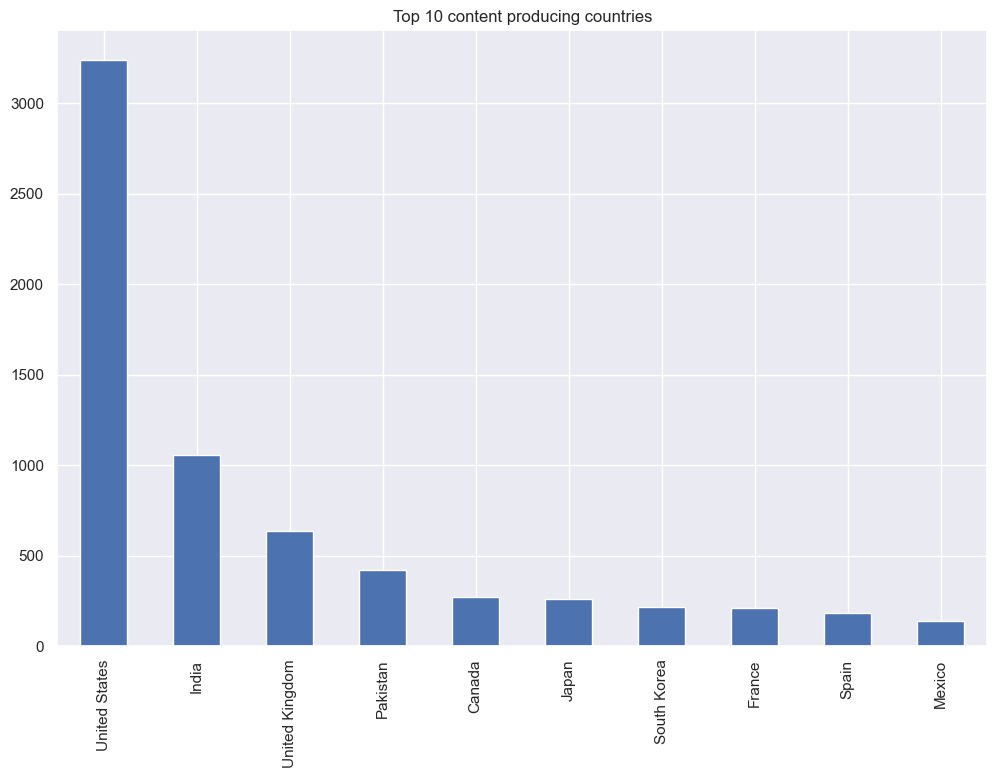

In [90]:
# Plot a bar chart

top_10_countries.plot(kind='bar', title='Top 10 content producing countries');

**Data-driven Insights**

- 86 countries are contributing to the content on Netflix, that's almost half the countries across the Globe. The diversity in location demonstrates that Netflix is catering to the global market which is likely to have a significant commercial impact on global subscriptions. 

- Neflix is streaming content predominantly produced in the USA. 

- US dominates by far, producing more than triple (3240) the content compared to India (1046). 

- India is producing almost double content compared to UK (638). 

Let's categorise the data by Movies and TV Shows to gain further insights into the composition of  the content.

# Diversity of Movie content on Netflix

Exploration of the top ten countries that have contibuted towards the movie content on Netflix.

In [91]:
# Use data that does not contain unknown countries. 
# Split (groupby) data by type of content, return count of content produced, filter first 10 rows. 

countries_movies = df[df['country'] != 'Unknown'].groupby([
    'type'])['country'].value_counts().head(10)

countries_movies

# Alternative code
#df[df['type'] == 'Movie'][['country']].value_counts().head(11).drop('Unknown', level=0)

type   country       
Movie  United States     2395
       India              975
       United Kingdom     387
       Canada             187
       France             148
       Spain              129
       Egypt              109
       Nigeria             96
       Mexico              90
       Japan               87
Name: country, dtype: int64

Note: Pakistan is no longer part of this group as the country is not producing movies. Pakistan therefore, must be producing a huge proportion of TV Shows.

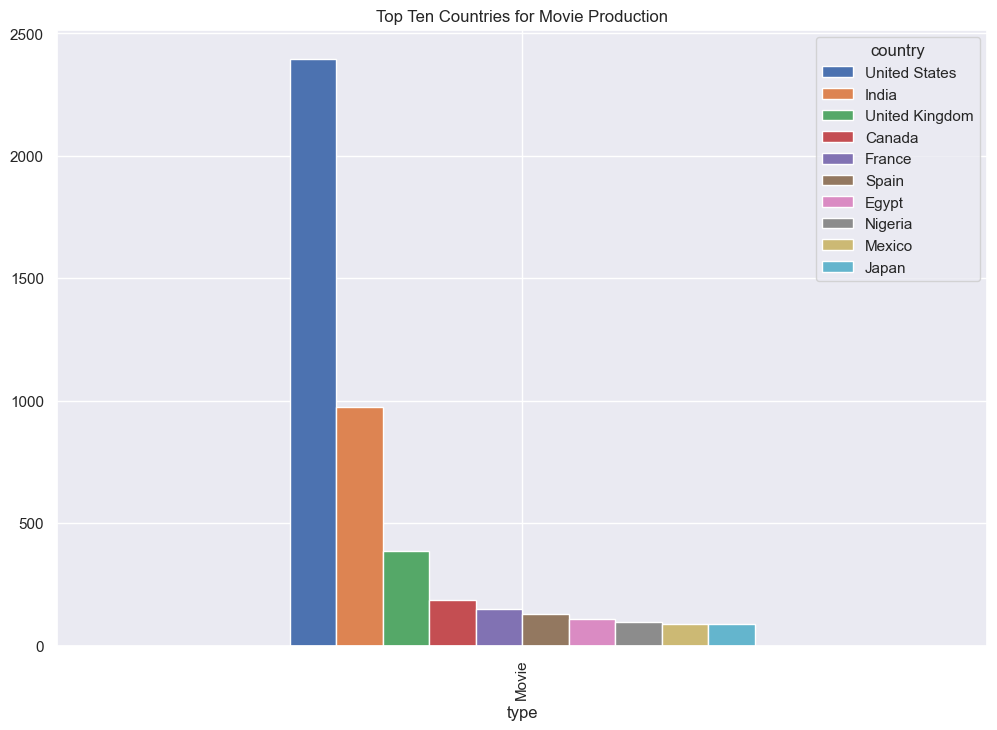

In [92]:
# Bar chart will show the frequency of movies produced per country

countries_movies.unstack().sort_values(
    by='type').plot(kind='bar', title='Top Ten Countries for Movie Production');

**Data-driven Insights**

- Neflix is streaming movies predominantly produced in the USA. 

- The United states contributed the most movies by far, more than double compared to India. 

- There is a significant drop in movie contributions in countries outside the US and India. 

- Data suggests Bollywood and Hollywood Movie industries are most prevalent. 

- United Kingdom and Canada follows after India. 

- The remaining 6 countries have contributed similar number of movies. 

The descriptive analysis of movie contributions for the top ten countries are as follows: 

In [93]:
# Contribution of movies from the US

movies_united_states = df[df['type'] == 'Movie'][['country']].value_counts()[0]
movies_united_states

2395

In [94]:
# Total number of movies contributed

total_movies = len(df[df['type'] == 'Movie'])
total_movies

6124

In [95]:
# US movie contribution as a percentage 

movie_industry_us = round((movies_united_states/ total_movies)*100, 2)
movie_industry_us

39.11

**The United States contributed 39.11 % towards the movie content.**

The calculations are repeated for India, UK and Canada. 

In [96]:
movies_india = df[df['type'] == 'Movie'][['country']].value_counts()[1]
movie_industry_india = round((movies_india/ total_movies)*100, 2)
movie_industry_india

15.92

**India contributed 15.92 % towards the movie content.**

In [97]:
movies_uk = df[df['type'] == 'Movie'][['country']].value_counts()[2]
movie_industry_uk = round((movies_uk/ total_movies)*100, 2)
movie_industry_uk

6.32

**UK contributed 6.32 % towards the movie content.** (as streamed on Netflix).


In [98]:
movies_canada = df[df['type'] == 'Movie'][['country']].value_counts()[3]
movie_industry_canada = round((movies_canada/ total_movies)*100, 2)
movie_industry_canada

4.2

**Canada contributed 4.2 % towards the movie content.**

Below is the calculation for the mean movie contribution for the 6 remaining countries.

In [102]:
# Take the last 6 countries, calculate average number of movies contributed by those countries. 

avg_movies_country_5_10 = round(df[df['country'] != 'Unknown'].groupby([
    'type'])['country'].value_counts().head(10)[4:].mean())

avg_movies_country_5_10

110

In [103]:
movie_contribution_country_5_10 = round((avg_movies_country_6_10/total_movies)*100, 2)
movie_contribution_country_5_10

1.8

**The remaining 6 countries contributed 1.8 % towards the movie content.**

In [105]:
# What percentage of the movie contributions attributed to the top ten countries.
top_ten_movie_contributions = movie_industry_us + movie_industry_india + movie_industry_uk + \
                        movie_industry_canada + movie_contribution_country_5_10

top_ten_movie_contributions 

67.35

**Data-driven Insights**

- The top ten countries have contributed approximately 67% of the movie content. The remaining 76 countries have therefore contributed 33%. 

- The movie content is dominated by Hollywood, Bollywood and British movies, indicating that subscribers are likely to deem these types of movies as 'popular'.

- The top ten countries are diverse in location, demonstrating the diversity in movie content. This is likely to have a positive impact on subscription numbers accross the globe. 

# Diversity of TV content on Netflix


Exploration of the top ten countries that have contibuted towards TV content on Netflix. The following analysis process for TV Shows is smiliar to the process taken for Movies, however, we will split the dataframe by type (movie and tv show).

In [106]:
# Filter the original dataframe to show rows with 'TV Show'. 

tvshow = df[df['type'] == 'TV Show']
tvshow.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
4,TV Show,Jailbirds New Orleans,Unknown,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
15,TV Show,Crime Stories: India Detectives,Unknown,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"


In [107]:
# There are 2663 rows / TV Shows.

len(tvshow)

2663

In [108]:
# 59 countries produced TV Show content (2663 TV Shows).

countries_tvshow = tvshow['country'].nunique()
countries_tvshow

# tvshow.groupby(['country'])['type'].nunique().sum()

59

In [109]:
# 27 countries have not produced TV Shows. 

countries_no_tvshow = tvshow['country'].value_counts().tail(27).count()
countries_no_tvshow

27

In [110]:
# Show the 27 countries that have not produced TV Shows in the Netflix dataset. 

tvshow['country'].value_counts().tail(27)

Cambodia        0
Syria           0
Cameroon        0
Peru            0
Bulgaria        0
Ghana           0
Bangladesh      0
Venezuela       0
Vietnam         0
West Germany    0
Georgia         0
Greece          0
Paraguay        0
Soviet Union    0
Guatemala       0
Hungary         0
Somalia         0
Slovenia        0
Iran            0
Serbia          0
Jamaica         0
Kenya           0
Romania         0
Mozambique      0
Portugal        0
Namibia         0
Zimbabwe        0
Name: country, dtype: int64

NOTE: Netflix is streaming movies released in countries that no longer exist: West Germany and Soviet Union. This is likely to be the reason for no TV Show data for these locations. Follow up countries would be Germany and Russia.

In [111]:
df[df['country'] == 'West Germany']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
5613,Movie,Hitler - A Career,"Joachim Fest, Christian Herrendoerfer",West Germany,2017-02-10,1977,TV-MA,150 min,"Documentaries, International Movies"


In [112]:
df[df['country'] == 'Soviet Union']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
5080,Movie,Alibaba Aur 40 Chor,"Latif Faiziyev, Umesh Mehra",Soviet Union,2018-01-15,1980,TV-14,147 min,"Action & Adventure, International Movies, Sci-..."


Netflix bought the license to show these movies, movies released in the year the state existed. 

In [113]:
# Countries that have not produced any content are not part of this dataset. 

tvshow[tvshow['country'] == 'Cambodia']

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,


In [114]:
# There are no 'Unknown' countries

len(tvshow[tvshow['country'] == 'Uknown'])

0

In [115]:
# 2136 out of 2663 tv shows are produced by the top ten countries

top10_total_tvshows = tvshow['country'].value_counts()[0:10].sum()
top10_total_tvshows

2136

In [116]:
# 80% of TV Shows are produced by the top ten countries.

percentage_tvshow_top10 = round((top10_total_tvshows / len(tvshow))*100, 2)
percentage_tvshow_top10

80.21

**Data-driven Insights.**

- Contributors to TV content (59 countries) demonstrates a lower diversity of TV shows in comparison to movies (86 countries). This could be reflection of the global TV industry (smaller market than the movie industry). 

- The top ten countries have produced 80% of the TV Shows.

- The remaining countries (49) are have produced 20% of the TV Shows.

- It could be beneficial to gain more data regarding the global TV industry. A starting point could include further research regarding TV shows produced in countries that have not contributed to the TV content. 

- Increasing the diversity of TV shows may result in a higher quantity of subscribers, catering to a global audience. 


Let's plot the number of TV Shows produced by the top ten countries (below).

In [117]:
# Index into the top ten countries producing tv shows. 
# There are no unknown countries in the list. 

countries_tvshows_top10 = tvshow['country'].value_counts()[0:10]
countries_tvshows_top10

United States     845
Pakistan          349
United Kingdom    251
Japan             172
South Korea       165
Canada             84
India              81
Taiwan             71
France             65
Australia          53
Name: country, dtype: int64

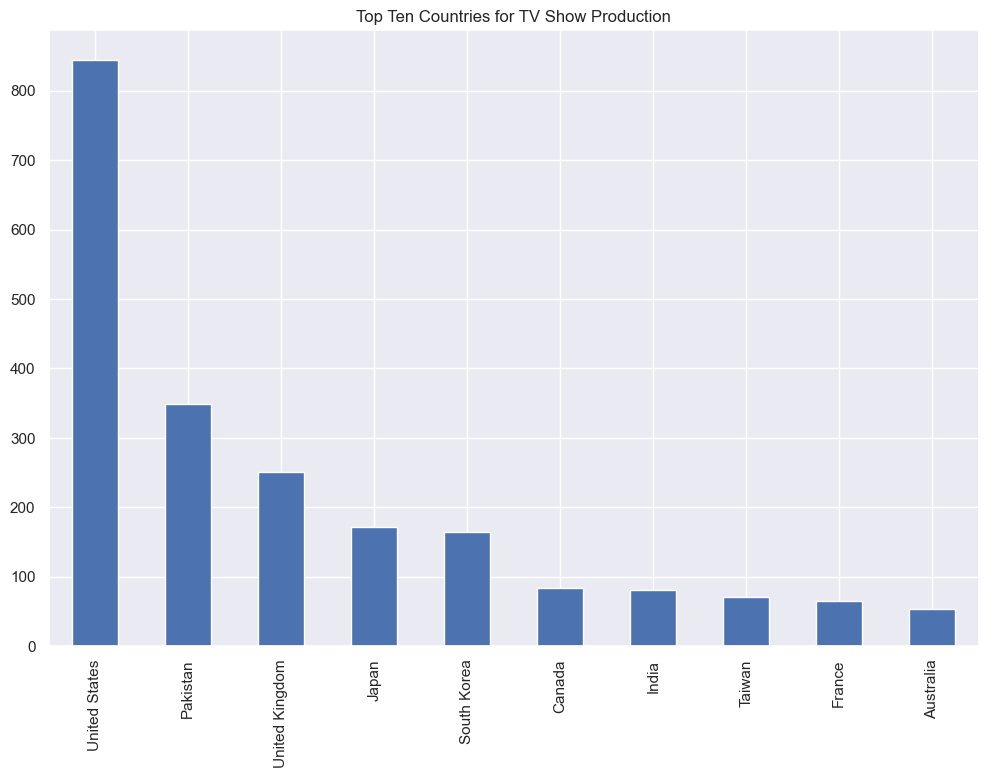

In [118]:
# Plot the data on a barchart

countries_tvshows_top10.plot(kind='bar', title='Top Ten Countries for TV Show Production');

**Data-driven Insights**

- US, Pakistan and UK are the top three contributors.

- The US is dominating the TV Show market by more than 50%, compared to Pakistan.

- Japan and South Korea are almost equal competitors in the TV Show industry.

- The latter 5 countries are producing similar number of TV Shows overall. 

- India and Pakistan, although close in region, have contributed different category of content.

- The TV content on Netflix is predominantly catering to subscribers who enjoy Western and South Asian content. It may be commercially beneficial to increase the diversity of content (from different geographical regions) to attract more subscribers.  

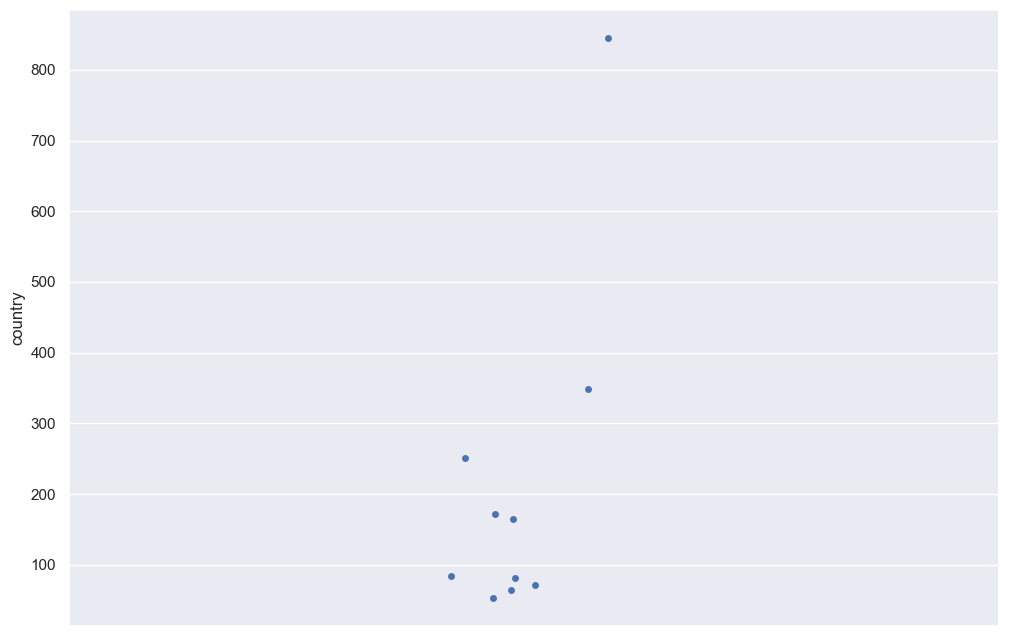

In [119]:
sns.stripplot(countries_tvshows_top10);

**Data-driven Insights**

- The strip plot shows the distribution of TV Shows produced in different countries, every data point is represented by a single country. 

- 5 countries have produced under 100 TV shows. 

- 2 countries have produced between 150 and 200 TV Shows. 

- 2 countries have produced between 250 and 350 TV Shows.

- 1 country has produced approximately 845 TV Shows, showing a positive skew in the data. 


Descriptive statistics regarding the top 5 countries that have contributed towards TV content. 

In [120]:
# TV Shows contributed by the US.

us_total_tv = len(tvshow[tvshow['country'] == 'United States'])
us_total_tv

845

In [121]:
us_tvshow_market = round((us_total_tv / len(tvshow))*100, 2)
us_tvshow_market

31.73

The US contributed 31.73% towards TV content.

In [122]:
pk_total_tv = len(tvshow[tvshow['country'] == 'Pakistan'])
pk_total_tv

349

In [123]:
pk_tvshow_market = round((pk_total_tv / len(tvshow))*100, 2)
pk_tvshow_market

13.11

Pakistan contributed 13.11% towards TV content.


In [124]:
uk_total_tv = len(tvshow[tvshow['country'] == 'United Kingdom'])
uk_total_tv

251

In [125]:
uk_tvshow_market = round((uk_total_tv / len(tvshow))*100, 2)
uk_tvshow_market

9.43

The United Kingdom contributed 9.43% towards TV content.

In [126]:
jp_total_tv = len(tvshow[tvshow['country'] == 'Japan'])
jp_total_tv

172

In [127]:
jp_tvshow_market = round((jp_total_tv / len(tvshow))*100, 2)
jp_tvshow_market

6.46

Japan contributed 6.46% towards TV content.

In [128]:
sk_total_tv = len(tvshow[tvshow['country'] == 'South Korea'])
sk_total_tv

165

In [129]:
sk_tvshow_market = round((sk_total_tv / len(tvshow))*100, 2)
sk_tvshow_market

6.2

South Korea contributed 6.2% towards TV content.

Mean TV contributions for the 5 remaining countries.

In [130]:
avg_tvshow_country_5_10 = tvshow['country'].value_counts().head(10)[5:].mean()
avg_tvshow_country_5_10

70.8

In [131]:
# percentage 

tvshow_industry_countries_5_10 = round((avg_tvshow_country_5_10 / len(tvshow))*100, 2)
tvshow_industry_countries_5_10

2.66

The remaining 5 countries, in the top ten, contributed 2.66% towards TV content on Netflix.

In [132]:
# Overall percentage of TV content contributed by the top ten countries 

top_ten_tvshow_production = us_tvshow_market + pk_tvshow_market + uk_tvshow_market + \
                jp_tvshow_market + sk_tvshow_market + tvshow_industry_countries_5_10

top_ten_tvshow_production

69.59

**Data-driven Insights.**

The top ten countries have produced approximately 70% of TV Shows in the Netflix dataset. The remaining 27 countries have therefore produced 33% of movies. The industry is likely dominated by US, Pakistani and British TV Shows. Then followed by Japanese and South Korean TV Shows. 

**Recomendations**: Research availability of TV content on a global scale to increase and diversify global subscribers.  

**Recomendations**: Gather further data in the form of customer surveys in attempt to pilot additional TV show content amongst subscribers in different geographical locations.

**Recomendations**: Advertise launch of new TV content in conjunction with promotional subscription offers to attract more subscribers. Review outcome to indicate success of campaign and return on investment (ROI).    

# Genre Analysis: Prevalence / Popularity. 

As part of the genre analysis, I will explore the 'directors', 'rating' and 'listed_in' columns.

In [133]:
# There is an exhaustive list of genres in the dataset.

df['listed_in'].nunique()

513

In [175]:
# Repetition of genres
# The length of the string is lengthy, containing genres as well as subgenres.

df['listed_in'].value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

In [153]:
# Although there are a repetition of genres, there are no repetitions in titles.

df['title'].value_counts().max()

1

In [176]:
# split each string into a list of strings. Split the string at every comma. 
# transform each element of the string list to a row using explode() method.
# The number of rows have substantially increased as the index values are replicated

df['listed_in'].str.split(',').explode().count()

19287

In [223]:
# each string is readable and concise
# list the top ten genres

top_10_genre = df['listed_in'].str.split(',').explode().value_counts().head(10)
top_10_genre

 International Movies     2624
Dramas                    1598
Comedies                  1209
Action & Adventure         859
Documentaries              829
 Dramas                    826
International TV Shows     772
 Independent Movies        735
 TV Dramas                 694
 Romantic Movies           613
Name: listed_in, dtype: int64

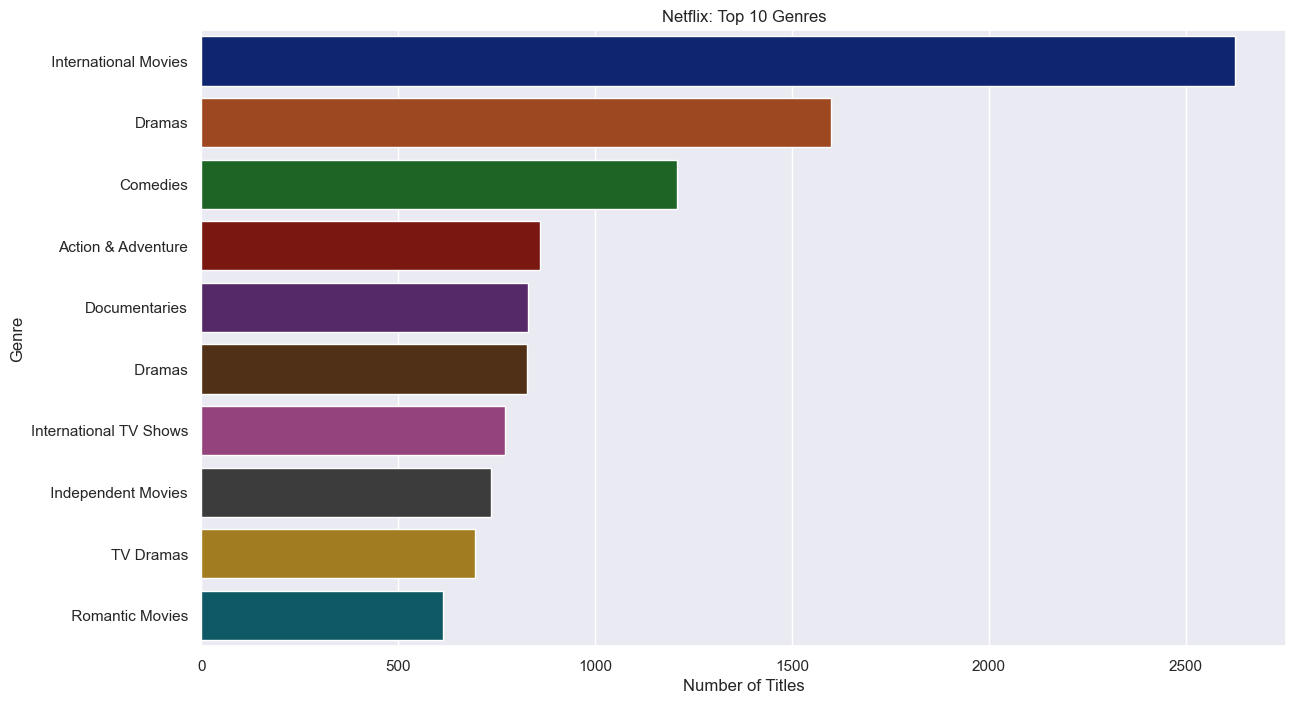

In [260]:
plt.figure(figsize=(14, 8))
sns.barplot(y=top_10_genre.index, x=top_10_genre.values, palette='dark')
plt.title('Netflix: Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

**Data-driven Insights**

The top ten genres are shown above. 

- International movies take the lead with 2624 titles, this reflects the high number of content produced in India as well as the Hispanic countries and Phillipines.  

- Dramas (1598 titles) and Comedies (1209 titles) follow with a high prevalence.

- Action & Adventure (859 titles) and Dramas (829 titles) come almost equally third.


In [304]:
# Top 10 directors

top_10_directors = df['director'].value_counts().drop('Unknown').head(10)
top_10_directors

Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Name: director, dtype: int64

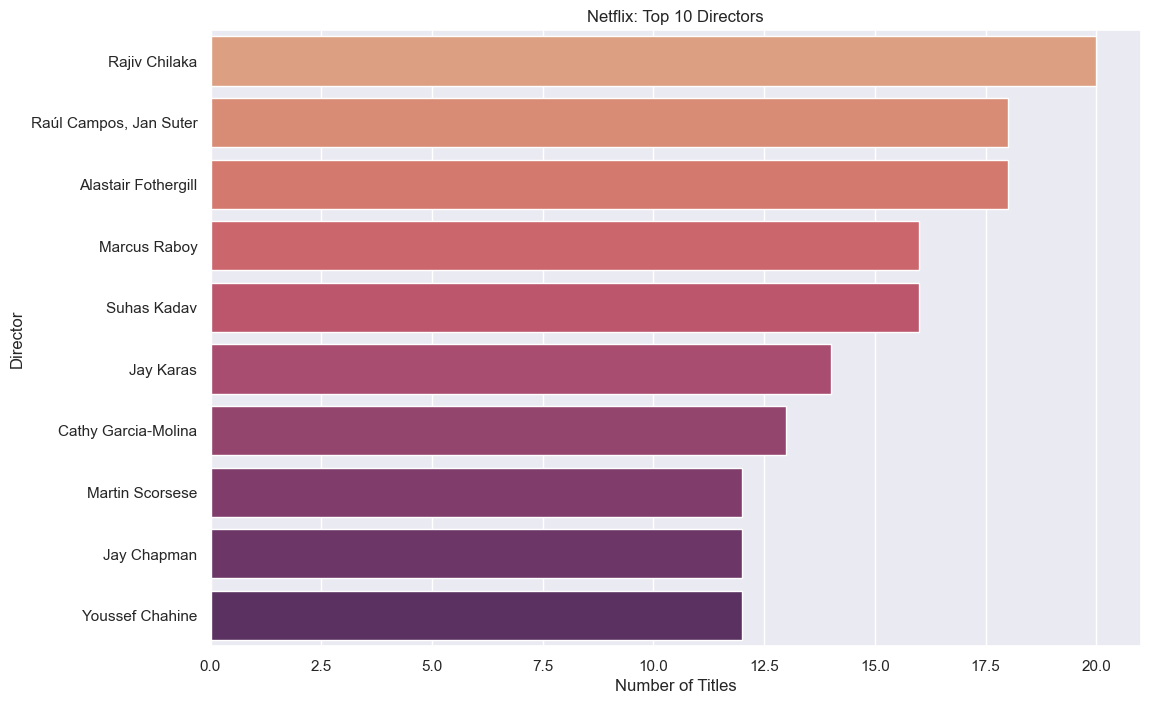

In [264]:
sns.barplot(y=top_10_directors.index, x=top_10_directors.values, palette='flare')
plt.title('Netflix: Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director');


In [290]:
df[df['director'] == 'Rajiv Chilaka'].head(4)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
420,Movie,Chhota Bheem: Bheem vs Aliens,Rajiv Chilaka,India,2021-07-22,2010,TV-Y7,69 min,"Children & Family Movies, Sports Movies"
407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,India,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies
408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,India,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies
409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,India,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies


In [291]:
df[df['director'] == 'Raúl Campos, Jan Suter'].head(4)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
5002,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Argentina,2018-03-02,2018,TV-MA,51 min,Stand-Up Comedy
4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter",Mexico,2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy
4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Argentina,2018-07-06,2018,TV-14,66 min,Stand-Up Comedy
4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Chile,2018-06-29,2018,TV-MA,77 min,Stand-Up Comedy


In [303]:
df[df['director'] == 'Alastair Fothergill'].head(3)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
6811,TV Show,Frozen Planet,Alastair Fothergill,United Kingdom,2016-01-28,2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV..."
7749,TV Show,Planet Earth: The Complete Collection,Alastair Fothergill,United Kingdom,2015-04-22,2006,TV-PG,1 Season,"British TV Shows, Docuseries, International TV..."
8215,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,United Kingdom,2015-10-10,2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV..."


In [305]:
df[df['listed_in'] == 'Comedies'].head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
913,Movie,The Circle - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,2021-05-07,2021,TV-14,35 min,Comedies
28,Movie,Grown Ups,Dennis Dugan,United States,2021-09-20,2010,PG-13,103 min,Comedies
1029,Movie,Dad Stop Embarrassing Me - The Afterparty,Unknown,Pakistan,2021-04-16,2021,TV-14,37 min,Comedies
153,Movie,Janoskians: Untold and Untrue,Brett Weiner,United States,2021-09-01,2016,TV-MA,88 min,Comedies
183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,United States,2021-09-01,2008,PG-13,114 min,Comedies


**Data-driven Insights**

If we explore the data in the 'listed_in' and 'director' columns, we can observe the following:

- The data shows a high prevalence of International Movies focused on Children & Family, as reflected by the most popular genres and directors. The most prevalent International Movies in the dataset were produced in India, followed by Hispanic countries.

- Most frequent director, does not equate to the highest prevalence of movies, e.g, Rajiv Chilaka is the most frequent director producing 20 movies in India, however, the highest overall movies were created in the US.   

- British Director, Alastair Fothergill, another frequent director has produced British TV Docuseries, however, American TV shows are more prevalent in the dataset. We can therefore assume that the US has a much higher number of directors, hence the highest overall content in the dataset.

- The diversity in directors and geographical locations is a good indicator that Netflix is catering towards global audience. 

# Up coming....

- Analysis of 'ratings'

- Release Year - How recent is the content on Netflix and does this indicate popularity?

- Are there any seasonal patterns in the 'date-added' column?

- Does the duration of the content correlate with the prevalence / popularity?

In [ ]:
#df['date_added'].dt.strftime('%d/%m/%y')